In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

traning=pd.read_csv('Training set values.csv')
traning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [146]:
traning.shape

(59400, 40)

In [147]:
traning[traning['waterpoint_type']=='communal standpipe']==True

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59394,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59395,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [148]:
traning['waterpoint_type']

0                 communal standpipe
1                 communal standpipe
2        communal standpipe multiple
3        communal standpipe multiple
4                 communal standpipe
                    ...             
59395             communal standpipe
59396             communal standpipe
59397                      hand pump
59398                      hand pump
59399                      hand pump
Name: waterpoint_type, Length: 59400, dtype: object

In [149]:
traning['waterpoint_type']=='communal standpipe'

0         True
1         True
2        False
3        False
4         True
         ...  
59395     True
59396     True
59397    False
59398    False
59399    False
Name: waterpoint_type, Length: 59400, dtype: bool

In [150]:
lables=pd.read_csv('Training set labels.csv')
lables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [151]:
lables.shape

(59400, 2)

In [152]:
data=traning.copy()
data.columns.find_values=('status_groups')

In [153]:
catagory_taning_columns=traning.select_dtypes(include=['object']).columns
catagory_taning_columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [154]:
number_taning_column=traning.select_dtypes(include=('float64','int64')).columns
number_taning_column

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [155]:
traning.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [156]:
traning.isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
waterpoint_type_group        0
population                   0
num_private                  0
wpt_name                     0
latitude                     0
longitude                    0
gps_height                   0
date_recorded                0
amount_tsh                   0
basin                        0
recorded_by                  0
waterpoint_type              0
water_quality                0
source_class                 0
source_type                  0
source                       0
quantity_group               0
quantity                     0
quality_group                0
payment_type                 0
construc

In [157]:
traning[number_taning_column].isnull().sum().sort_values(ascending=False)

construction_year    0
population           0
district_code        0
region_code          0
num_private          0
latitude             0
longitude            0
gps_height           0
amount_tsh           0
id                   0
dtype: int64

In [158]:
traning[catagory_taning_columns].isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
waterpoint_type_group        0
waterpoint_type              0
wpt_name                     0
basin                        0
region                       0
lga                          0
ward                         0
recorded_by                  0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
date_recorded                0
dtype: int64

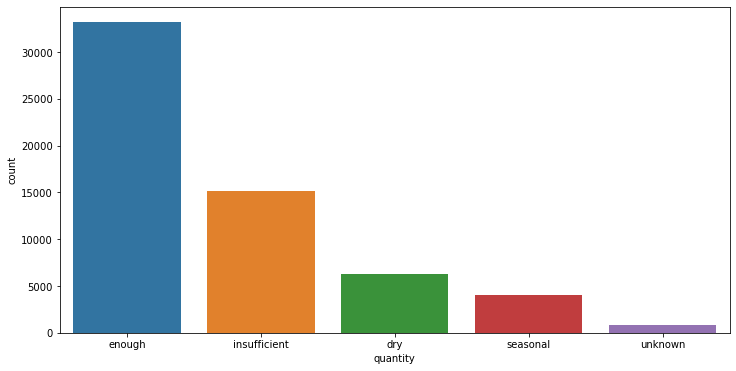

In [159]:
plt.figure(figsize=(12,6))
sns.countplot(x='quantity',data=traning,)

In [160]:
traning.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [161]:
lables.isnull().sum()

id              0
status_group    0
dtype: int64

In [162]:
num_columns=lables.select_dtypes(include=['float64','int64']).columns
num_columns

Index(['id'], dtype='object')

In [163]:
cat_columns=traning.select_dtypes(include='object').columns
cat_columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [164]:
num_columns=traning.select_dtypes(include=['float64','int64']).columns
num_columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [165]:
traning.isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
waterpoint_type_group        0
population                   0
num_private                  0
wpt_name                     0
latitude                     0
longitude                    0
gps_height                   0
date_recorded                0
amount_tsh                   0
basin                        0
recorded_by                  0
waterpoint_type              0
water_quality                0
source_class                 0
source_type                  0
source                       0
quantity_group               0
quantity                     0
quality_group                0
payment_type                 0
construc

In [166]:
traning.isnull().sum().sort_values(ascending=True)

id                           0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
construction_year            0
payment_type                 0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
water_quality                0
waterpoint_type              0
recorded_by                  0
basin                        0
amount_tsh                   0
date_recorded                0
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
population                   0
waterpoint_type_group        0
region                       0
region_code                  0
district_code                0
lga                          0
ward    

In [167]:
traning[num_columns].isnull().sum().sort_values(ascending=False)

construction_year    0
population           0
district_code        0
region_code          0
num_private          0
latitude             0
longitude            0
gps_height           0
amount_tsh           0
id                   0
dtype: int64

In [168]:
traning[cat_columns].isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
waterpoint_type_group        0
waterpoint_type              0
wpt_name                     0
basin                        0
region                       0
lga                          0
ward                         0
recorded_by                  0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
date_recorded                0
dtype: int64

In [169]:
traning['funder'].fillna(traning['funder'].mode()[0], inplace=True) 
traning['scheme_name'].fillna(traning['scheme_name'].mode()[0], inplace=True)
traning['scheme_management'].fillna(traning['scheme_management'].mode()[0], inplace=True) 
traning['installer'].fillna(traning['installer'].mode()[0], inplace=True)
traning['public_meeting'].fillna(traning['public_meeting'].mode()[0], inplace=True)
traning['permit'].fillna(traning['permit'].mode()[0], inplace=True)
traning['subvillage'].fillna(traning['subvillage'].mode()[0], inplace=True)

In [170]:
traning[cat_columns].isnull().sum().sort_values(ascending=False)

waterpoint_type_group    0
waterpoint_type          0
funder                   0
installer                0
wpt_name                 0
basin                    0
subvillage               0
region                   0
lga                      0
ward                     0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
date_recorded            0
dtype: int64

In [171]:
traning.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [114]:
num_columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [172]:
traning=pd.merge(traning,lables,on='id',how='left')

In [142]:
traning.shape

(59400, 43)

In [173]:
traning.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [174]:
#conditon of hanpumps throughout area
traning.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [175]:
#propotion of each function of pumps
traning.status_group.value_counts()/len(traning)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [176]:
traning.shape

(59400, 41)

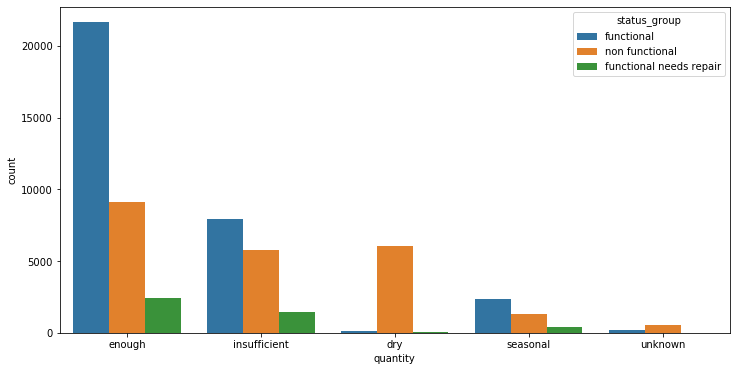

In [177]:
# dry quantity has more nonfunctional water pumps
plt.figure(figsize=(12,6))
sns.countplot(x='quantity',data=traning,hue='status_group')

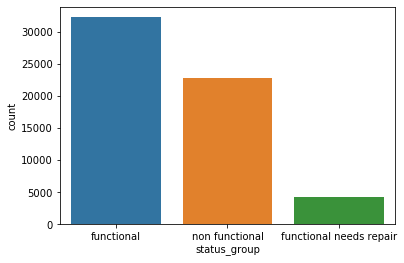

In [178]:
sns.countplot(traning.status_group)

In [179]:
traning.shape

(59400, 41)

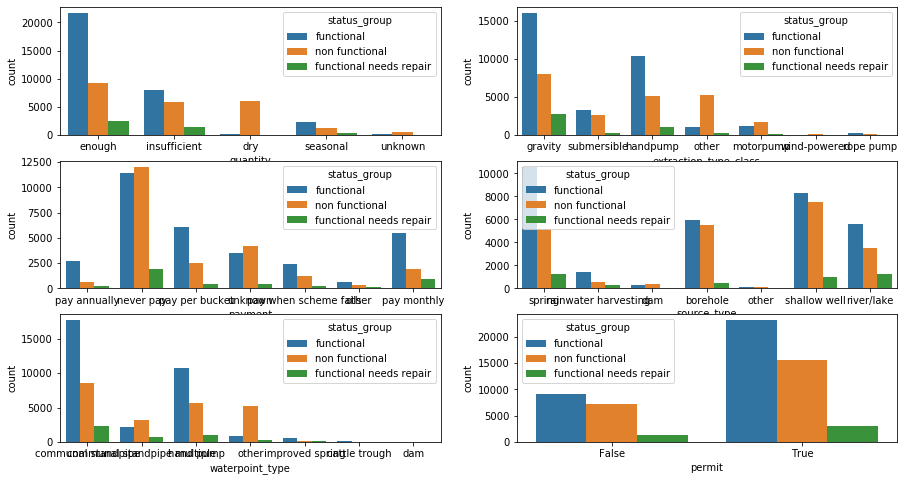

In [180]:
fig, ax = plt.subplots(figsize=(15,8))
plt.subplot(3,2,1)
sns.countplot(x='quantity', data=traning, hue='status_group') # dry quantity has more nonfunctional water pumps
#plt.xticks(rotation=-45)
plt.subplot(3,2,2)
sns.countplot(x='extraction_type_class', data=traning, hue='status_group') # 
#plt.xlabel('xlabel', fontsize=18)
plt.subplot(3,2,3)
sns.countplot(x='payment', data=traning, hue='status_group')
plt.subplot(3,2,4)
sns.countplot(x='source_type', data=traning, hue='status_group')
plt.subplot(3,2,5)
sns.countplot(x='waterpoint_type', data=traning, hue='status_group')
plt.subplot(3,2,6)
sns.countplot(x='permit', data=traning, hue='status_group')
#plt.tight_layout()
plt.show()

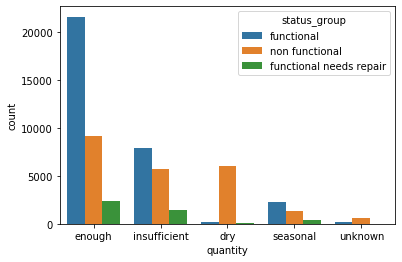

In [181]:

sns.countplot(x='quantity', data=traning, hue='status_group')

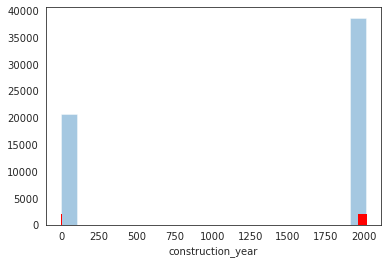

In [182]:
with sns.axes_style('white'):
    sns.distplot(traning.construction_year, hist=True, kde=False, rug=True, rug_kws={"color": "r"})

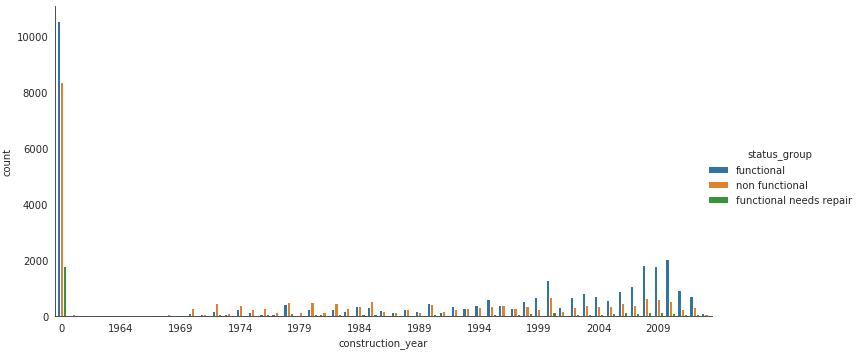

In [183]:
with sns.axes_style('white'):
    g = sns.factorplot("construction_year", data=traning, aspect=2, hue='status_group',
                       kind="count")
    g.set_xticklabels(step=5)

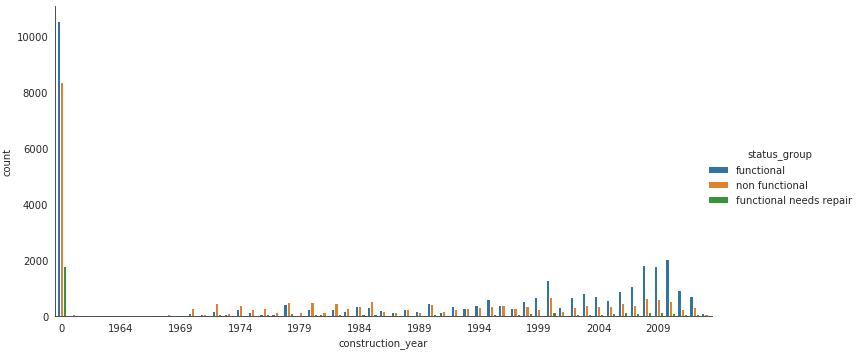

In [184]:

x = traning[traning['construction_year'] > 0]
with sns.axes_style('white'):
    g = sns.factorplot("construction_year", data=traning, aspect=2, hue='status_group',
                       kind="count")
    g.set_xticklabels(step=5)

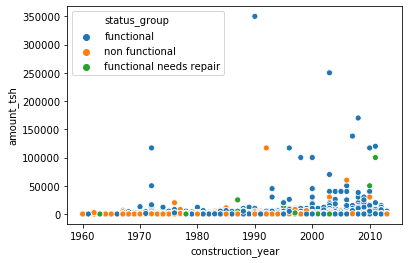

In [185]:
 #older the pumps more are nonfunctional
sns.scatterplot(x=x.construction_year, y=x.amount_tsh, hue=x.status_group)

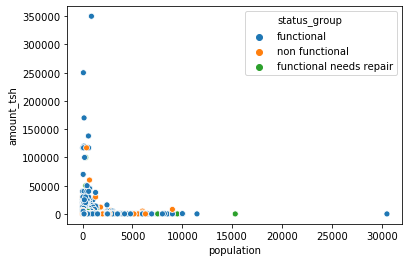

In [186]:
# as population increases amount of water decreases
sns.scatterplot(x=x.population, y=x.amount_tsh, hue=x.status_group)


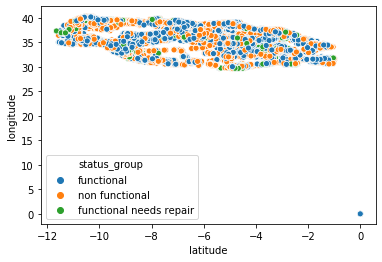

In [187]:
sns.scatterplot(y=traning.longitude, x=traning.latitude, hue=traning.status_group)

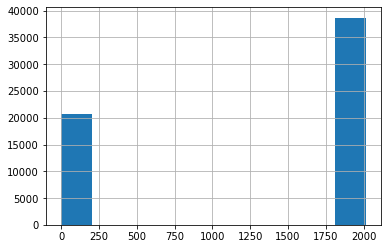

In [188]:
traning['construction_year'].hist(bins=10)

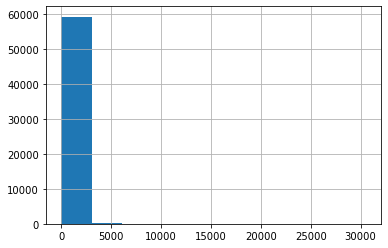

In [189]:
traning['population'].hist(bins=10)

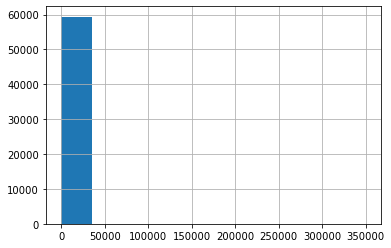

In [190]:
traning['amount_tsh'].hist(bins=10)

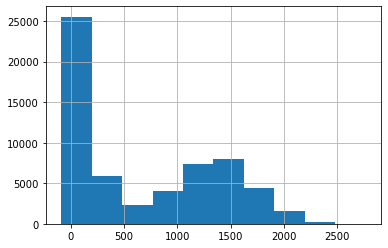

In [191]:
traning['gps_height'].hist(bins=10)

In [193]:
test=pd.read_csv('test set values.csv')


In [194]:
test

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [195]:
test_cat_columns=test.select_dtypes(include='object').columns
test_cat_columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [196]:
test_num_columns=test.select_dtypes(include=['float64','int64']).columns
test_num_columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [197]:
test[test_num_columns].isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [198]:
test[test_cat_columns[:-1]].isnull().sum().sort_values(ascending=False)

scheme_name              7092
scheme_management         969
installer                 877
funder                    869
public_meeting            821
permit                    737
subvillage                 99
waterpoint_type             0
wpt_name                    0
basin                       0
region                      0
lga                         0
ward                        0
recorded_by                 0
extraction_type             0
source_class                0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
date_recorded               0
dtype: int64

In [199]:
## Filling the missing values with Mode of the respective column
test['funder'].fillna(test['funder'].mode()[0], inplace=True) 
test['installer'].fillna(test['installer'].mode()[0], inplace=True) 
test['subvillage'].fillna(test['subvillage'].mode()[0], inplace=True) 
test['public_meeting'].fillna(test['public_meeting'].mode()[0], inplace=True) 
test['scheme_management'].fillna(test['scheme_management'].mode()[0], inplace=True) 
test['scheme_name'].fillna(test['scheme_name'].mode()[0], inplace=True) 
test['permit'].fillna(test['permit'].mode()[0], inplace=True)

In [200]:

test.isnull().sum().sort_values(ascending=False)

waterpoint_type_group    0
waterpoint_type          0
population               0
ward                     0
lga                      0
district_code            0
region_code              0
region                   0
subvillage               0
basin                    0
num_private              0
wpt_name                 0
latitude                 0
longitude                0
installer                0
gps_height               0
funder                   0
date_recorded            0
amount_tsh               0
public_meeting           0
recorded_by              0
scheme_management        0
payment_type             0
source_class             0
source_type              0
source                   0
quantity_group           0
quantity                 0
quality_group            0
water_quality            0
payment                  0
scheme_name              0
management_group         0
management               0
extraction_type_class    0
extraction_type_group    0
extraction_type          0
c

In [201]:

# outliers/ Anomolies Handling:

traning_0 = traning[(traning.construction_year > 0) & (traning.population > 0)]
print("Before : construction year with 0", traning.shape)
print("After : Anomalies handling", traning_0.shape)

Before : construction year with 0 (59400, 41)
After : Anomalies handling (37344, 41)


In [202]:
test_0=test.drop(['id', 'date_recorded', 'num_private', 'wpt_name', 'scheme_name', 'funder', 'recorded_by', 'installer' ], axis=1)
test_0

,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0.0,1996,35.290799,-4.059696,Internal,Magoma,Manyara,21,3,Mbulu,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,0.0,1569,36.656709,-3.309214,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,0.0,1567,34.767863,-5.004344,Internal,Msatu,Singida,13,2,Singida Rural,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,0.0,267,38.058046,-9.418672,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,500.0,1260,35.006123,-10.950412,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,34,38.852669,-6.582841,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,1000.0,0,37.451633,-5.350428,Pangani,Mkondoa,Tanga,4,7,Kilindi,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,0.0,1476,34.739804,-4.585587,Internal,Juhudi,Singida,13,2,Singida Rural,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,0.0,998,35.432732,-10.584159,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [203]:
test_0.shape

(14850, 32)

In [204]:
traning_0.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional


In [205]:
traning_0.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [206]:

submission=pd.DataFrame()
submission['id']=test['id']

In [207]:
submission.to_csv('submission.csv')